In [73]:
#Assignment 2: Problems 1a, 1b, 2a, 2b, 3a, and 3b

In [97]:
#All Libraries needed to complete assingment are imported below

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [98]:
#Importing file from local directory

file_path = 'C:/Users/nicocorb/Downloads/ECGR4105/Housing.csv'
df = pd.read_csv(file_path)

In [99]:
df.head() #checking first 5 rows to verify my csv has imported correctly

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [100]:
m = len(df) #Retreiving number of rows
m

545

In [101]:
df.describe() #Taking a look at csv descriptions before processing

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [111]:
#Pre processing function to split parameters into proper arrays

#Defining scaling function to be used 
def scale_features(X, method='none'):
    if method == 'standardize':
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    elif method == 'normalize':
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
        scaler = None
    return X_scaled, scaler

#pre process function
def pre_processing(df, features, target, scale_method='none'):
    #retrieve copy so to not alter original data set
    df = df.copy()

    #one-hot encodeing 
    df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)

    #extract features and added bias turm for theta0
    X = df[features].values

    #Apply scaling if necessary and then adding bias
    X, scaler = scale_features(X, method=scale_method)
    X = np.column_stack((np.ones((X.shape[0], 1)), X))

    #extract target as column vector
    y = df[target].values.reshape(-1, 1)

    #split data into training and test sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val, scaler

In [112]:
#Cost and gradient descent functions to be used for processing machine learning data

#Computing cost function for linear regression
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    sqr_errors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqr_errors)
    return J

#Defining the gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [149]:
#Now I can use a train and plot function to complete the process w/ out normalization

#Train and plot function
def train_model_and_plot(df, features, target, alpha=0.01, iterations=1000, scale_method='none'):
    #Run preprocessing
    X_train, X_val, y_train, y_val, scaler = pre_processing(df, features, target, scale_method=scale_method)

    #Initialize theta and train
    theta = np.zeros((X_train.shape[1], 1))
    theta, train_loss = gradient_descent(X_train, y_train, theta, alpha, iterations)

    #Validation loss calculation
    val_loss = []
    for i in range(iterations):
        val_loss.append(compute_cost(X_val, y_val, theta))

    #Plotting
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_loss, label="Training Loss", color="blue")
    plt.plot(range(iterations), val_loss, label="Validation Loss", color="orange")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    final_cost = train_loss[-1]
    print(f"\nFinal Training Cost (MSE): {final_cost:.2f}")
    print("Final Theta Parameters:")
    print(theta.flatten())  # flatten to print as a 1D array

    return theta

Problem 1a


C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:7: RuntimeWarning: overflow encountered in square
  sqr_errors = np.square(errors)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:18: RuntimeWarning: overflow encountered in dot
  sum_delta = (alpha / m) * X.transpose().dot(errors)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:5: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:16: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta)


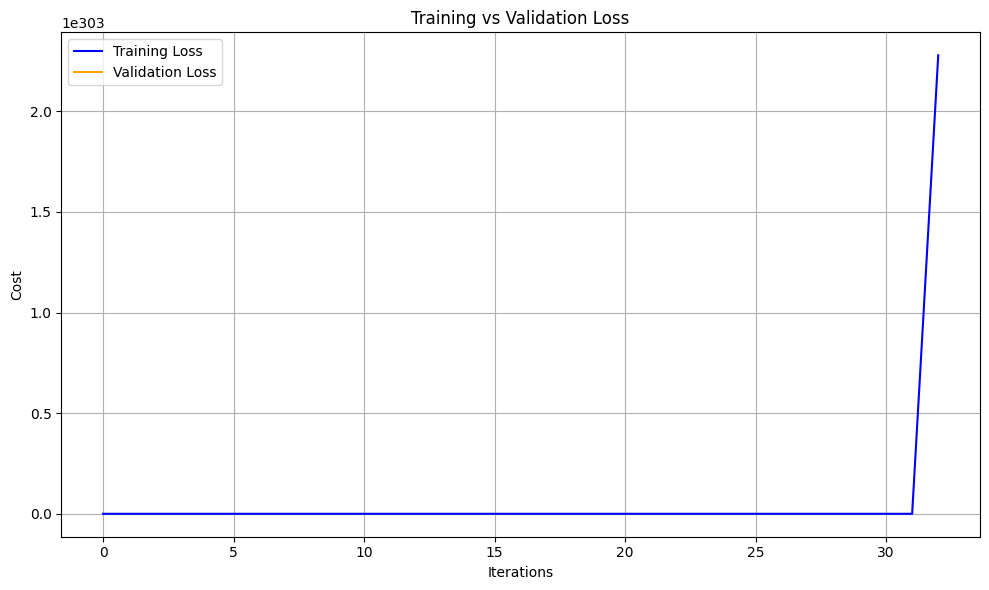


Final Training Cost (MSE): nan
Final Theta Parameters:
[nan nan nan nan nan nan]


In [150]:
#Problem 1a solution
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

print('Problem 1a')

theta1a = train_model_and_plot(df, features, target, alpha=0.001, iterations=1000, scale_method='none')

Problem 1b


C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:7: RuntimeWarning: overflow encountered in square
  sqr_errors = np.square(errors)
C:\Users\nicocorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:18: RuntimeWarning: overflow encountered in dot
  sum_delta = (alpha / m) * X.transpose().dot(errors)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:5: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta)
C:\Users\nicocorb\AppData\Local\Temp\ipykernel_42076\3906653465.py:16: RuntimeWarning: invalid value encountered in dot
  predictions = X.dot(theta)


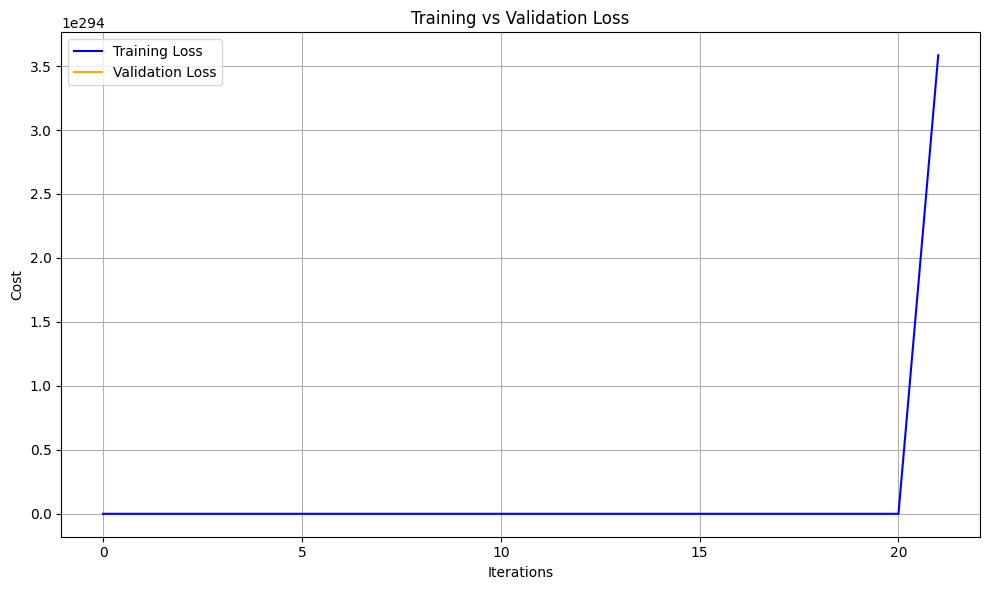


Final Training Cost (MSE): nan
Final Theta Parameters:
[nan nan nan nan nan nan nan nan nan nan nan nan]


In [151]:
#Problem 1b solution
features1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

print('Problem 1b')

#encoding all objects
df_encoded = pd.get_dummies(df, drop_first=True)

theta1b = train_model_and_plot(df_encoded, features1b, target, alpha=0.1, iterations=1000, scale_method='none')

In [152]:
#Problem 2

Problem 2a normalize


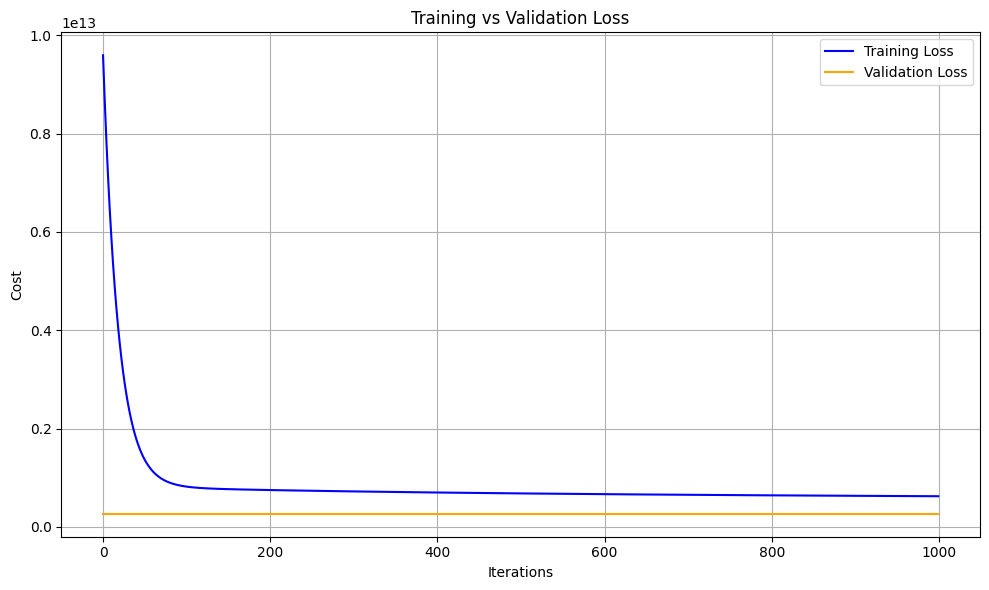


Final Training Cost (MSE): 622423795852.20
Final Theta Parameters:
[2737922.49032607 2146667.48406483 1468110.15877219 1659045.37991706
 1582032.80965249 1470120.91037407]


In [195]:
#Problem 2a solution for normalization
features2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

print('Problem 2a normalize')

theta1a = train_model_and_plot(df, features2a, target, alpha=0.025, iterations=1000, scale_method='normalize')

Problem 2a standardize


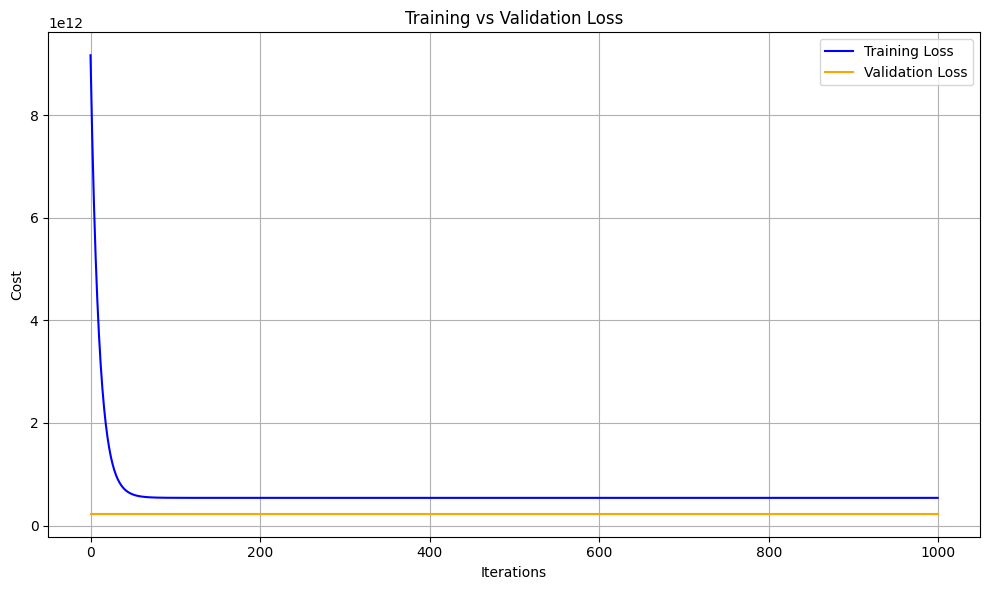


Final Training Cost (MSE): 540003284530.63
Final Theta Parameters:
[4744533.74907446  669669.62933035  111527.30102272  595247.30781504
  429101.96588968  290656.73479687]


In [194]:
#Problem 2a solution for normalization
features2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

print('Problem 2a standardize')

theta1a = train_model_and_plot(df, features2a, target, alpha=0.060, iterations=1000, scale_method='standardize')

Problem 2b normalize


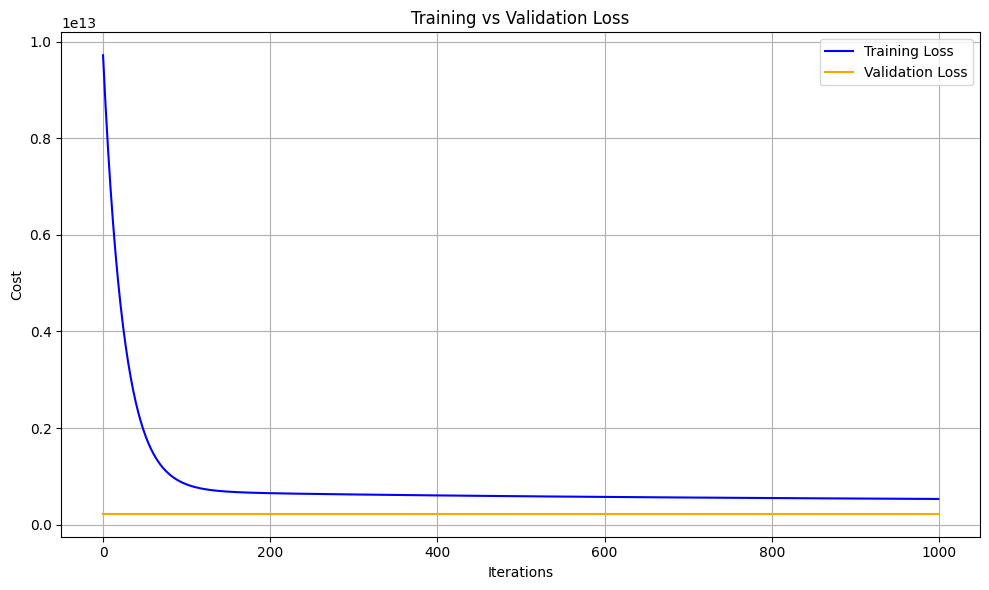


Final Training Cost (MSE): 530940456039.86
Final Theta Parameters:
[1860935.9467362   947796.20684204  991190.36121113  832098.34459413
 1034587.10387132 1156092.28814587  383268.56306515  464985.03000343
  340587.87333837 1023667.54895608  847684.61833883  568500.66789743]


In [188]:
#Problem 2b solution for standardization
features2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

print('Problem 2b normalize')

#encoding all objects
df_encoded = pd.get_dummies(df, drop_first=True)

theta1b = train_model_and_plot(df_encoded, features2b, target, alpha=0.01, iterations=1000, scale_method='normalize')

Problem standardize


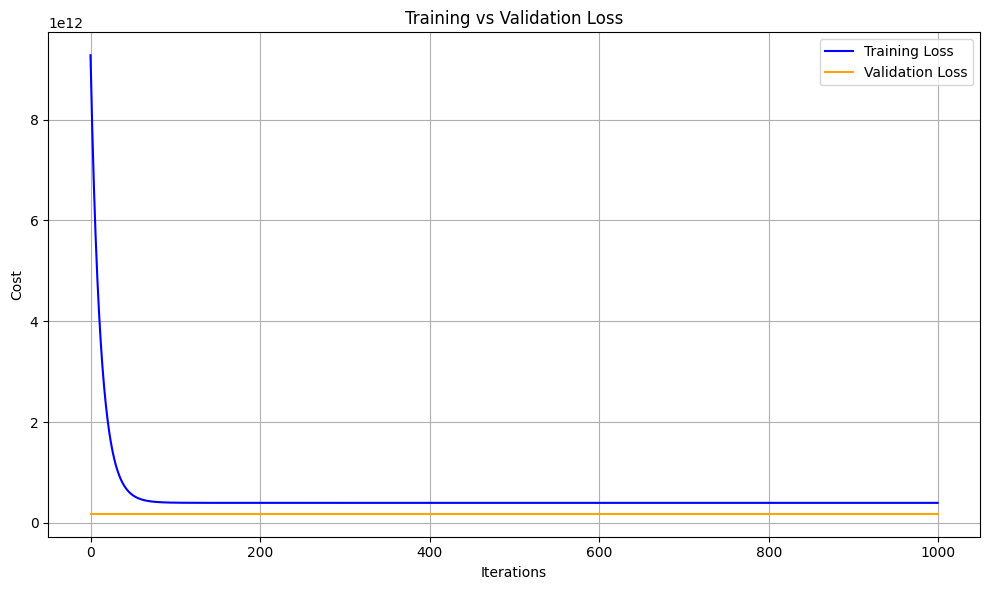


Final Training Cost (MSE): 396992400003.91
Final Theta Parameters:
[4741436.23259853  515391.83377932   57872.78533783  556891.0706987
  370000.88354935  143741.72831445   93178.81444541  207547.03394971
  149010.39702451  375713.44644276  212997.79756295  269942.44281824]


In [186]:
#Problem 2b solution for standardization
features2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

print('Problem standardize')

#encoding all objects
df_encoded = pd.get_dummies(df, drop_first=True)

theta1b = train_model_and_plot(df_encoded, features2b, target, alpha=0.05, iterations=1000, scale_method='standardize')

In [157]:
#Updating gradient descent function and plotting function to incorporate lambda for regularization

#Updated gradient descent function
def gradient_descent_2(X, y, theta, alpha, iterations, lambda_):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y

        # Regularization term (don't regularize bias term θ₀)
        reg_term = (lambda_ / m) * np.copy(theta)
        reg_term[0] = 0  # no regularization for bias term

        gradient = (1 / m) * (X.T.dot(errors)) + reg_term
        theta -= alpha * gradient

        # Note: for evaluation set, do not include the regularization term in cost
        cost = (1 / (2 * m)) * np.sum(np.square(errors))
        cost_history.append(cost)

    return theta, cost_history

#Updated plot function
def train_model_and_plot_2(df, features, target, scale_method='standardize', alpha=0.01, iterations=1000, lambda_=0.1):
    X_train, X_val, y_train, y_val, _ = pre_processing(df, features, target, scale_method)

    theta = np.zeros((X_train.shape[1], 1))
    theta, train_loss = gradient_descent_2(X_train, y_train, theta, alpha, iterations, lambda_)

    val_loss = [compute_cost(X_val, y_val, theta)] * iterations  # eval cost without regularization

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, '--', label="Validation Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Problem 3 - L2 Regularization ({scale_method})")
    plt.legend()
    plt.grid(True)
    plt.show()

    final_cost = train_loss[-1]
    print(f"\nFinal Training Cost (MSE): {final_cost:.2f}")
    print("Final Theta Parameters:")
    print(theta.flatten())  # flatten to print as a 1D array

    return theta

In [158]:
#Probelem 3

Problem 3a normalize


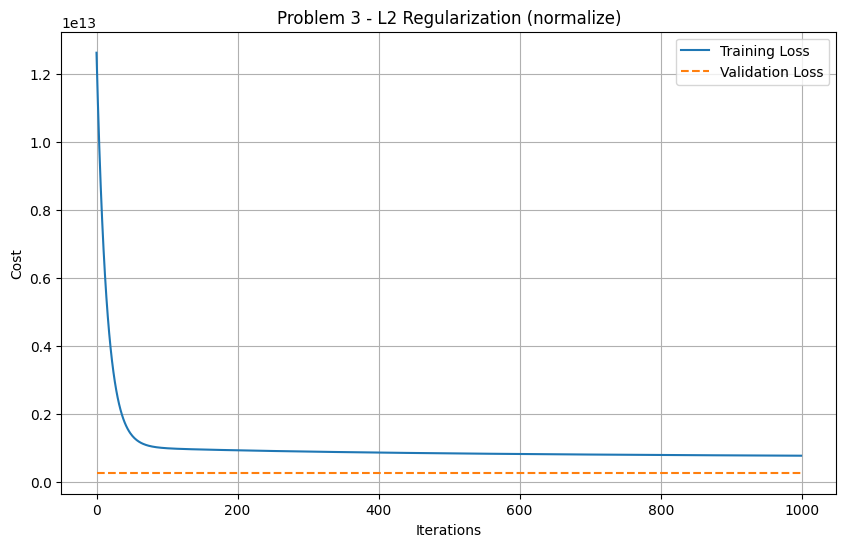


Final Training Cost (MSE): 759362397220.21
Final Theta Parameters:
[2675794.94629191 2347019.4455752  1436423.24113823 1850936.21554805
 1596192.38574397 1470460.03140827]


In [185]:
#Problem 3a solution for normalization
features3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

print('Problem 3a normalize')

theta3a = train_model_and_plot_2(df, features3a, target, scale_method='normalize', alpha=0.025, iterations=1000, lambda_=0.5)

Problem 3a standardize


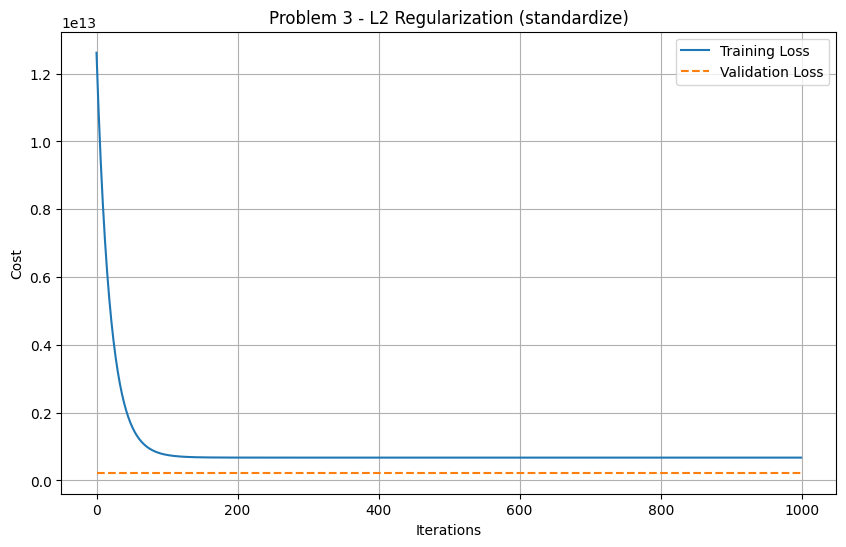


Final Training Cost (MSE): 675004652815.17
Final Theta Parameters:
[4744501.08855405  669024.40512684  111904.58518814  594615.63079161
  428682.58162164  290624.97221033]


In [183]:
#Problem 3a solution for normalization
features3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

print('Problem 3a standardize')

theta3a = train_model_and_plot_2(df, features3a, target, scale_method='standardize', alpha=0.025, iterations=1000, lambda_=0.5)

Problem 3a normalization


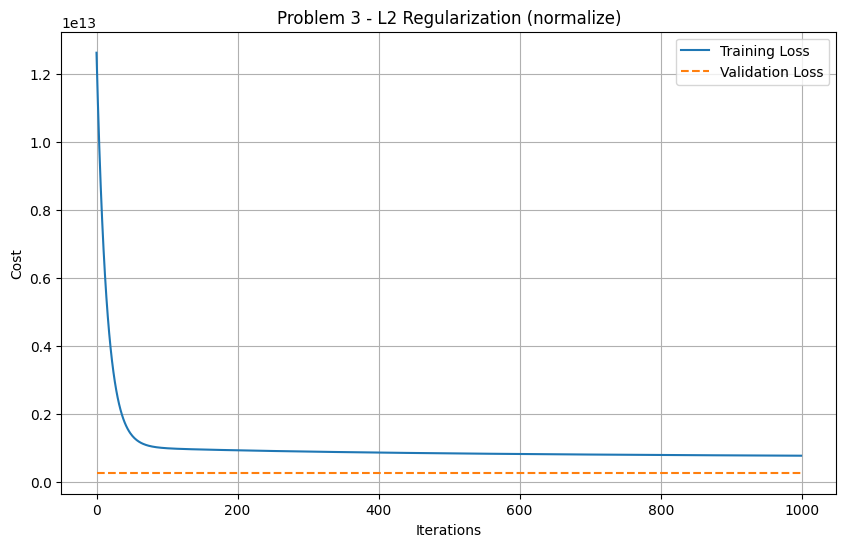


Final Training Cost (MSE): 759362397220.21
Final Theta Parameters:
[2675794.94629191 2347019.4455752  1436423.24113823 1850936.21554805
 1596192.38574397 1470460.03140827]


In [179]:
#Problem 3b solution for normalization 
features3b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

print('Problem 3a normalization')

#encoding all objects
df_encoded = pd.get_dummies(df, drop_first=True)

theta3b = train_model_and_plot_2(df, features3a, target, scale_method='normalize', alpha=0.025, iterations=1000, lambda_=0.5)

Problem 3b standardize


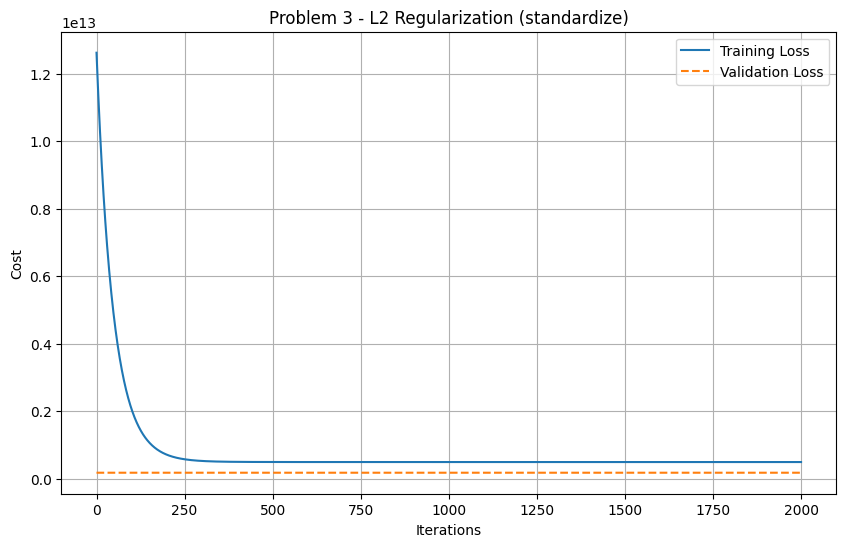


Final Training Cost (MSE): 496241035055.50
Final Theta Parameters:
[4741409.33273818  514892.49405918   58369.30212986  556282.82062165
  369532.64522506  143870.17549319   93386.07982182  207211.3837922
  148851.40632287  375540.85406947  213033.76412392  269715.19200841]


In [175]:
#Problem 3b solution for standardization 
features3b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

print('Problem 3b standardize')

#encoding all objects
df_encoded = pd.get_dummies(df, drop_first=True)

theta3b = train_model_and_plot_2(df, features3b, target, scale_method='standardize', alpha=0.01, iterations=2000, lambda_=0.5)